<a href="https://colab.research.google.com/github/johannesmichael/AMLD-24-multimodal/blob/main/AMLDNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multimodal Machine Learning for Human Behaviour Understanding

Communication goes beyond mere words. It encompasses facial expressions, tone of voice, and other verbal and non-verbal cues that play a significant role in conveying meaning and building rapport. Assessing interview skills solely based on verbal responses may overlook crucial aspects of communication proficiency. Incorporating multimodal features—data from various modalities such as video, audio and text—can provide a more comprehensive understanding of an individual's communication abilities during interviews.

### Task
The objective of this task is to develop a machine learning model capable of predicting an individual's communication skills during interviews based on various features and indicators.

### Approach
By integrating facial, audio, and textual features through multimodal fusion, this approach enables a holistic assessment of candidates' interview communication skills, capturing nuanced aspects of verbal and non-verbal behavior. The developed predictive model offers a data-driven and objective method for evaluating candidates' performance, enhancing the effectiveness and fairness of the interview process. We extract facial features using Py-feat, MFCCs using librosa and Word embeddings for text using Word2Vec. We fuse the vectors from these modalities to gether and use these to predict the candidates Communication Score.

Let us now get the files associated with completing our task from github: https://github.com/Laxminarayen/AMLD-24.git

In [1]:
!git clone https://github.com/Laxminarayen/AMLD-24.git
%cd AMLD-24/

Cloning into 'AMLD-24'...
remote: Enumerating objects: 76, done.
remote: Total 76 (delta 0), reused 0 (delta 0), pack-reused 76
Receiving objects: 100% (76/76), 103.95 MiB | 27.77 MiB/s, done.
Resolving deltas: 100% (25/25), done.
/content/AMLD-24


In [2]:
!pip install sentence_transformers
import nltk
nltk.download('all')
#installing Py-feat for colab
!pip install -q py-feat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.1/163.1 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 796.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 60.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.4/381.4 kB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.4/825.4 kB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 72.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.86 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.


In [3]:
VidDIR = "FacialFeatureExtraction/"
AudDIR = "AudioFeatureExtraction/"

# 1. Facial Feature Extraction

Facial landmarks, action units, head pose, and emotions are all key components of facial expression analysis, a field within computer vision and affective computing that aims to interpret human emotions and expressions from facial images or videos.

Detecting Face Emotions / Action Unit values as a task consist of multiple smaller tasks like Face detection, Face Aligning then followed by Emotion detection, Action unit detection, etc., Since it is not in the scope of this session to explore respective tasks / train seperate models for each of these tasks we take help of toolkits with pre-trained models to perform this task

Here we make use of Py-Feat:

```
Cheong, J.H., Jolly, E., Xie, T. et al. Py-Feat:
Python Facial Expression Analysis Toolbox.
Affec Sci 4, 781–796 (2023).
https://doi.org/10.1007/s42761-023-00191-4

```



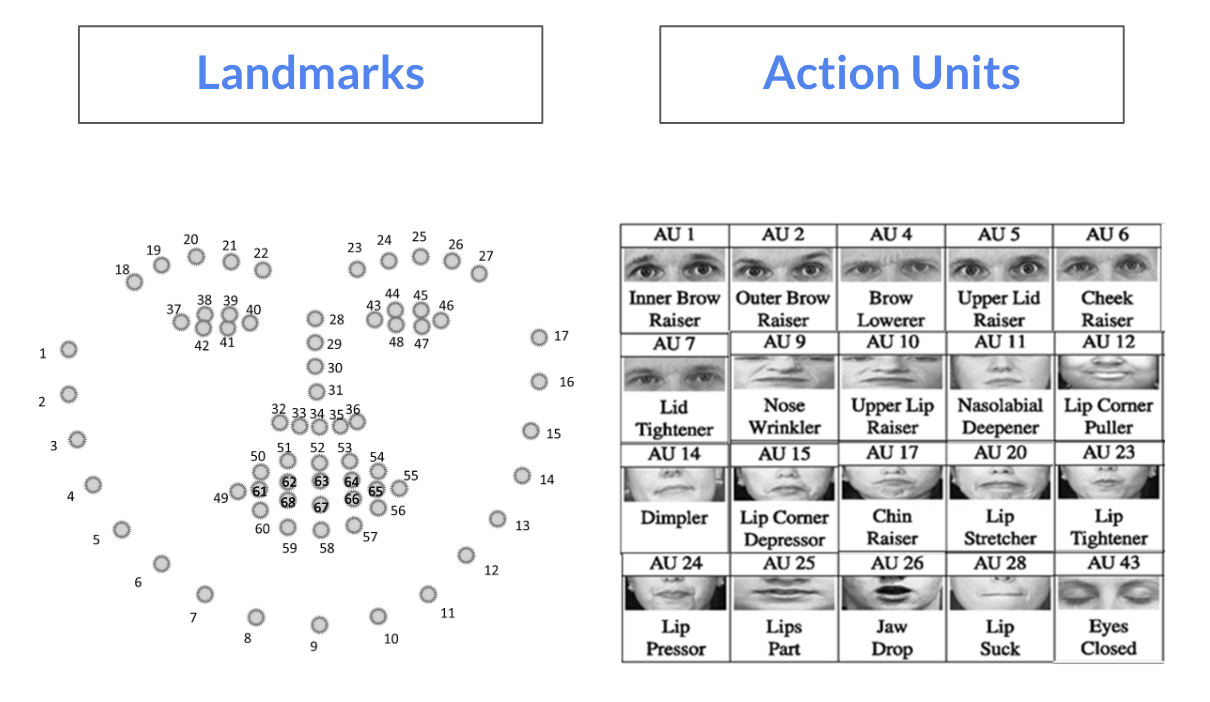

## 1.a Detecting a single face from a single image


In [ ]:
#Face process Libraries
from feat.plotting import imshow
from IPython.core.display import Video
from feat import Detector
import glob
import os

In [ ]:
detector = Detector(
    face_model="retinaface",
    landmark_model="mobilefacenet",
    au_model='xgb',
    emotion_model="resmasknet",
    facepose_model="img2pose",
)

detector


i. Face Detection & Alignment - **Retina Face:** RetinaFace is a state-of-the-art face detection and alignment model that is widely used in computer vision applications. RetinaFace is designed to accurately detect and align faces in images with high efficiency and robustness, particularly in challenging scenarios such as low-resolution images, occlusions, and variations in pose and illumination.

ii. Landmark Detection - **Mobile Face Net** MobileFaceNet is based on the MobileNetV2 architecture, which is known for its efficiency and suitability for deployment on resource-constrained devices.

iii. Action Unit Detection - **XGB** XGBoost Classifier model trained on Histogram of Oriented Gradients

iv. Emotion Detection - **ResMaskNet** focuses on deep architecture with the attention mechanism. It uses a segmentation network to refine feature maps, enabling the network to focus on relevant information to make correct decisions.

v. Face Pose Detection - **Img2Pose** Six degrees of freedom (6DoF), 3D face pose estimation without face detection or landmark
localization.

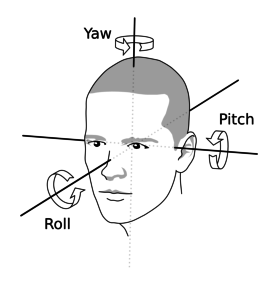


**DataSet: MSP-FACE**
```
Andrea Vidal, Ali Salman, Wei-Cheng Lin, and Carlos Busso. 2020.
MSP-Face Corpus: A Natural Audiovisual Emotional Database.
In Proceedings of the 2020 International Conference on Multimodal Interaction (ICMI '20).
**Association** for Computing Machinery, New York, NY, USA, 397–405. https://doi.org/10.1145/3382507.3418872
```



In [ ]:
# Get the full path
single_face_img_path = os.path.join(VidDIR, "ImgFiles/Img1.png")

# Plot it
imshow(single_face_img_path)

In [ ]:
single_face_prediction = detector.detect_image(single_face_img_path)

# Show results
single_face_prediction

In [ ]:
single_face_prediction.loc[:,[i for i in single_face_prediction.columns if 'x' in i]]

In [ ]:
single_face_prediction.loc[:,[i for i in single_face_prediction.columns if 'y' in i]]

In [ ]:
single_face_prediction.loc[:,[i for i in single_face_prediction.columns if 'AU' in i]]

We can very well see the girl crying in the image which reflects in the sadness score from the table below

In [ ]:
single_face_prediction.emotions

In [ ]:
# Get the full path
single_face_img_path = os.path.join(VidDIR, "ImgFiles/Img2.png")

# Plot it
imshow(single_face_img_path)

In [ ]:
single_face_prediction = detector.detect_image(single_face_img_path)

# Show results
single_face_prediction

In [ ]:
single_face_prediction.emotions

Same with happieness score in the detection result

Face bounding boxes play a crucial role in face detection and recognition tasks, providing spatial localization of faces within images or videos. By accurately delineating the boundaries of detected faces, bounding boxes facilitate subsequent analysis and processing, enabling a wide range of computer vision applications in various domains.

In [ ]:
single_face_prediction.facebox

In [ ]:
figs = single_face_prediction.plot_detections(poses=True)

In [ ]:
figs = single_face_prediction.plot_detections(faces='aus', muscles=True)

In [ ]:
#Saving Single Frame Feature Extraction
single_face_prediction.to_csv("output.csv", index=False)

## 1.b Video level process

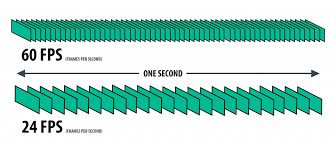

In [ ]:
#Video Processing
video_path = os.path.join(VidDIR, "VidFiles/File4.mp4")

# Show video
Video(video_path, embed=True)

In [ ]:
video_prediction = detector.detect_video(video_path, skip_frames=24)
video_prediction.head()

In [ ]:
axes = video_prediction.emotions.plot()

This plot above shows the change in emotions across different frames. We could see from the video where the speaker maintains a neutral face throughout which is also reflected in the plot.

# 2. Audio Feature Extraction
Feature extraction in audio processing is a crucial step aimed at capturing the relevant information from raw audio signals in a form that is suitable for further analysis and interpretation. Extracted features serve as representations of the underlying characteristics of the audio, facilitating tasks such as speech recognition, music classification, sound event detection, and speaker identification. There are various techniques for extracting features from audio signals, each tailored to specific applications and objectives.

In [ ]:
#Audio process Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

from scipy.io import wavfile
import librosa
import librosa.display

import scipy.io.wavfile as wavfile
import IPython.display as ipd

import warnings
warnings.filterwarnings('ignore')

## 2.a Audio Waves

Audio waves serve as rich sources of information for understanding human behavior across various domains, including communication, emotion, perception, social interaction, and cultural expression. By analyzing and interpreting acoustic signals, researchers can gain valuable insights into the complexities of human experience and contribute to the development of more inclusive, empathetic, and context-aware technologies and environments. Speech waves, also known as speech signals or speech waveforms is also combination of different amplitudes of two (or more) sine waves

In [ ]:
# read speech audio file using scipy package

wav_path = os.path.join(AudDIR, "AudFiles/File4.wav")
data, fs = librosa.load(wav_path)
# fs is sampling frequency
# sampling frequency nothing but how may samples present for second.
print(f"Sampling frequency : {fs} and Wave : {data}")

Let us now look at how the speech wave looks like

In [ ]:
plt.plot(data)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

Freq Ranges
- Low - Lower than 500Hz
- Medium - Between 500Hz - 2000Hz
- High - Above 2000Hz

In [ ]:
def generate_waveform(freq, duration, sample_rate=44100):
    t = np.linspace(0, duration, duration * sample_rate, endpoint=False)
    waveform = np.sin(2 * np.pi * freq * t)
    return waveform

In [ ]:
freq = 440  # Frequency in Hz (e.g., 440 Hz for A4 note)
duration = 2  # Duration in seconds
waveform = generate_waveform(freq, duration)
scaled_waveform = np.int16(waveform * 32767)
output_file = "output_440.wav"
sample_rate = 44100
wavfile.write(output_file, sample_rate, scaled_waveform)

ipd.Audio("output_440.wav")

In [ ]:
freq = 450  # Frequency in Hz (e.g., 440 Hz for A4 note)
duration = 2  # Duration in seconds
waveform = generate_waveform(freq, duration)
scaled_waveform = np.int16(waveform * 32767)
output_file = "output_450.wav"
sample_rate = 44100
wavfile.write(output_file, sample_rate, scaled_waveform)

ipd.Audio("output_450.wav")


How many of you perceived the difference between the waves that are just 10 units apart in the Hz scale?

In [ ]:
freq = 2500  # Frequency in Hz (e.g., 440 Hz for A4 note)
duration = 1  # Duration in seconds
waveform = generate_waveform(freq, duration)
scaled_waveform = np.int16(waveform * 32767)
output_file = "output_2500.wav"
sample_rate = 44100
wavfile.write(output_file, sample_rate, scaled_waveform)

#CAUTION!
#NOTE: This is high frequency Signal, we suggest you lower your volume get comfortable before playing this.!
ipd.Audio("output_2500.wav")

In [ ]:
freq = 2510  # Frequency in Hz (e.g., 440 Hz for A4 note)
duration = 1  # Duration in seconds
waveform = generate_waveform(freq, duration)
scaled_waveform = np.int16(waveform * 32767)
output_file = "output_2510.wav"
sample_rate = 44100
wavfile.write(output_file, sample_rate, scaled_waveform)

#CAUTION
#NOTE: This is high frequency Signal, we suggest you lower your volume get comfortable before playing this.!
ipd.Audio("output_2510.wav")

These are still waves that are 10 units apart, But how many of us can perceive the difference here?

- Human auditory perception is nonlinear, meaning that the perception of pitch, loudness, and timbre does not scale linearly with frequency.
- The perception of pitch is more precise at lower frequencies, while the perception of loudness follows a logarithmic scale, with higher sound pressure levels required to perceive changes in loudness at higher frequencies.
- Additionally, the sensitivity of the auditory system to changes in frequency and amplitude varies across the frequency spectrum, with certain frequency regions being more perceptually salient than others.

### Mel Spectrum
The Mel spectrum is an important variation of the traditional frequency spectrum, particularly in the field of speech and audio processing. While both the Mel spectrum and the frequency spectrum provide information about the distribution of energy or amplitude across different frequencies, they differ in their representation and perceptual relevance.

- The Mel spectrum is derived from the Mel scale, which is a perceptually based scale of pitch perception. It is designed to mimic the nonlinear frequency resolution of the human auditory system, which is more sensitive to changes in lower frequencies and less sensitive to changes in higher frequencies.

- By emphasizing frequencies that are more perceptually relevant and compressing the representation of higher frequencies, the Mel spectrum provides a more accurate and intuitive representation of the way humans perceive sound.



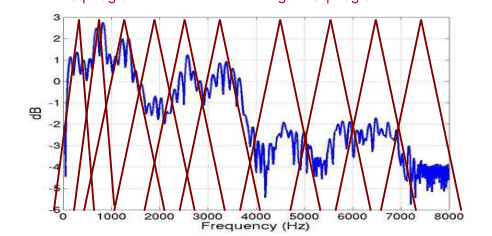

- We can observe that More no. of filters in low frequency region, and Lesser no. of filters in high frequency region
- Using Mel-Filters convert Spectrum to Mel-Spectrum

## 2.d MFCC

MFCCs involve additional steps such as taking the logarithm of the Mel spectrum and applying the Discrete Cosine Transform (DCT)

- Picture a Sound as a Painting:

  Imagine a sound, like someone talking or music playing, as a beautiful painting with different colors. Each color represents a different pitch or tone in the sound.

- Breaking Down the Painting:

  To understand this painting better, we need to break it down into smaller parts. Just like cutting a big cake into slices, we're going to break our painting into smaller sections.

- Using Special Glasses:

  Now, we put on special glasses called "Mel filters". These glasses help us see which colors are more important to our ears. Just like wearing sunglasses to protect our eyes from the sun, Mel filters help us focus on important parts of the sound.

- Taking Snapshots:

  With our special glasses on, we take snapshots of each small section of the painting. Each snapshot tells us how much of each color is present in that section.

- Putting Together Our Story:

  After taking snapshots of all the sections, we simplify them into a short story. This story, made up of important details from each snapshot, is our Mel-Frequency Cepstral Coefficients (MFCCs).

So, in simple terms, MFCCs are like a story we tell by looking at snapshots of different parts of a sound painting through special glasses called Mel filters. They help us understand the most important aspects of the sound in a way that's easy to grasp.

In [ ]:
wav_path = os.path.join(AudDIR, "AudFiles/File4.wav")
y, sr = librosa.load(wav_path)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

plt.figure(figsize=(10,4))
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

In [ ]:
def extract_mel_spectrogram_for_tts(wav_signal, fs):
    s = librosa.feature.mfcc(y=wav_signal,sr =fs,n_mfcc = 25,fmin  = 20, fmax = 7600,
             n_fft = 800,n_mels = 25,hop_length= 200,
             center = True)
    return s



```
SavePATH = "../drive/MyDrive/MFCCInterfaceAudios/"
for i in mp3Files:
  fileName = i.split('/')[-1].split('.')[0]
  fileName= fileName.lstrip("InterFaceAudiosMP3")
  print(fileName)
  y, sr = librosa.load(i)
  mfccfeatures = extract_mel_spectrogram_for_tts(y, sr)
  np.savetxt(SavePATH+fileName+'.txt', mfccfeatures, fmt='%d')
  #TO LOAD IT BACK!
  #arrayname = np.loadtxt('test1.txt', dtype=int)
  print(type(mfccfeatures))
```



#3. Text Feature Extraction
Word vectors, including Word2Vec, GloVe (Global Vectors for Word Representation), and FastText, are popular techniques used in natural language processing (NLP) to represent words as dense numerical vectors in a continuous vector space. Here's an overview of each technique:

- Word2Vec:

  - Word2Vec is a model developed by researchers at Google in 2013. It learns distributed representations of words based on their context in a large corpus of text.
  - The Word2Vec model consists of two architectures: the continuous bag-of-words (CBOW) model and the skip-gram model.
    - Continuous Bag-of-Words (CBOW): This model predicts the target word based on its context words within a fixed window size.
    - Skip-Gram: This model predicts the context words surrounding a target word.
  - Word2Vec uses a shallow neural network with a single hidden layer to learn word embeddings. The learned embeddings capture semantic relationships between words, such as similarity and analogy.
  - Word2Vec embeddings are trained using techniques like negative sampling or hierarchical softmax to efficiently handle large vocabularies.

- GloVe (Global Vectors for Word Representation):

  - GloVe is a word embedding model proposed by researchers at Stanford University in 2014. It learns word embeddings by analyzing the global word-word co-occurrence statistics in a large corpus of text.
  - Unlike Word2Vec, which learns embeddings based on local context windows, GloVe considers the entire corpus to capture global semantic relationships between words.
  - GloVe constructs a co-occurrence matrix that represents the frequency of word co-occurrences in the corpus. It then factorizes this matrix to obtain word embeddings that minimize the squared difference between the dot product of word vectors and the logarithm of their co-occurrence probabilities.
  - GloVe embeddings are trained using a weighted least squares regression objective, which allows them to capture both semantic and syntactic relationships between words.

- FastText:

  - FastText is an extension of the Word2Vec model developed by researchers at Facebook AI Research in 2016. It incorporates subword information by representing each word as a bag of character n-grams.
  - By considering subword information, FastText can handle out-of-vocabulary words and capture morphological variations and word structure better than traditional word embedding models.
  - FastText learns word embeddings by training a shallow neural network with a softmax output layer to predict the probability distribution of each word's context words or subword n-grams.
  - FastText embeddings are trained using techniques similar to Word2Vec.

- BERT
  - BERT (Bidirectional Encoder Representations from Transformers) is a pre-trained deep learning model developed by Google that has achieved state-of-the-art results in various natural language processing (NLP) tasks.
  - BERT belongs to the Transformer architecture family and is specifically designed to generate contextualized word embeddings, capturing rich semantic information from text.

Word vector files download: https://fasttext.cc/docs/en/pretrained-vectors.html

In [ ]:
#Lets now train our own word vectors
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

pd.options.display.max_colwidth = 200
%matplotlib inline
corpus = ['The sky is blue and beautiful.',
          'Love this blue and beautiful sky!',
          'The quick brown fox jumps over the lazy dog.',
          "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
          'I love green eggs, ham, sausages and bacon!',
          'The brown fox is quick and the blue dog is lazy!',
          'The sky is very blue and the sky is very beautiful today',
          'The dog is lazy but the brown fox is quick!'
]
labels = ['weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather', 'animals']

corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document': corpus,
                          'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df

## 3.a Text Preprocessings
Text preprocessing is a crucial step in natural language processing (NLP) tasks, where raw text data is transformed into a format that is suitable for analysis and modeling. Here's an explanation of three common text preprocessing techniques: special character removal, word tokenization, and stopword removal:

- Special Character Removal:

  - Special characters refer to any characters that are not letters or numbers, such as punctuation marks, symbols, and non-alphanumeric characters.
  - The purpose of special character removal is to clean the text data and remove unnecessary noise that may interfere with downstream NLP tasks.
  - Common special characters include punctuation marks (., !, ?, etc.), quotation marks ("), parentheses (), and other symbols (@, #, $, etc.).
  - Special character removal can be achieved using regular expressions or by using libraries such as Python's re module.

- Word Tokenization:

  - Word tokenization is the process of splitting raw text into individual words or tokens, which serve as the basic units of analysis in NLP tasks.
  - Tokenization involves breaking down a string of text into smaller units based on certain rules or patterns. The most common approach is to split the text on whitespace characters (spaces, tabs, line breaks).
  - However, tokenization becomes more complex when dealing with languages that use compound words, hyphens, or punctuation marks.
  - Tokenization can be performed using libraries such as NLTK (Natural Language Toolkit) or spaCy in Python, which provide pre-trained tokenizers for various languages.

- Stopword Removal:

  - Stopwords are common words that occur frequently in a language but typically carry little semantic meaning, such as articles (a, an, the), prepositions (in, on, at), conjunctions (and, but, or), and pronouns (he, she, it).
  - The purpose of stopword removal is to filter out these words from the text data to reduce noise and improve the quality of analysis.
  - Stopword removal is particularly useful in tasks such as text classification, where stopwords can dominate the frequency distribution without contributing much to the classification decision.
  - Lists of stopwords are available for different languages and can be used to filter out stopwords from text data. Libraries like NLTK provide built-in stopwords lists and functions for stopword removal.

In [ ]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

In [ ]:
norm_corpus = normalize_corpus(corpus)
norm_corpus

## 3.b Word Vector Creation for our corpus
Gensim is a popular Python library used for natural language processing (NLP) tasks, including word embedding models like Word2Vec. Here's how Gensim can be used for training Word2Vec models and performing various NLP tasks:

- Word2Vec Model Training:
  - Gensim provides an easy-to-use interface for training Word2Vec models on custom text corpora. You can train a Word2Vec model using the Word2Vec class provided by Gensim.
  - The Word2Vec class takes a list of sentences or an iterable of sentences as input and learns word embeddings based on the context of words in the sentences.
  - You can customize various parameters of the Word2Vec model, such as the size of the word vectors, the window size (context window), the minimum word frequency, and the number of training epochs.
  - After training, the Word2Vec model can be used to obtain word embeddings for words in the vocabulary.

In [ ]:
from gensim.models import word2vec

# tokenize sentences in corpus
wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in norm_corpus]

# Set values for various parameters
feature_size = 10    # Word vector dimensionality
window_context = 10          # Context window size
min_word_count = 1   # Minimum word count
sample = 1e-3   # Downsample setting for frequent words


w2v_model = word2vec.Word2Vec(tokenized_corpus, vector_size=feature_size,
                              window=window_context, min_count = min_word_count,
                              sample=sample)

## 3.c Visualizing Embeddings

### Document Level Embeddings as Average of word vectors in the docs

In [ ]:
def average_word_vectors(words, model, vocabulary, num_features):

    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.

    for word in words:
        if word in vocabulary:
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector,  model.wv[word])

    if nwords:
        feature_vector = np.divide(feature_vector, nwords)

    return feature_vector


def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index_to_key)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

In [ ]:
w2v_feature_array = averaged_word_vectorizer(corpus=tokenized_corpus, model=w2v_model,
                                             num_features=feature_size)
pd.DataFrame(w2v_feature_array)

### Clustering with word embeddings

In [ ]:
from sklearn.cluster import AffinityPropagation

ap = AffinityPropagation()
ap.fit(w2v_feature_array)
cluster_labels = ap.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

### PCA
Principal Component Analysis (PCA) is a widely used dimensionality reduction technique that helps in visualizing higher-dimensional features by transforming them into a lower-dimensional space while retaining most of the important information

- PCA aims to reduce the dimensionality of a dataset while preserving its essential structure and variability. It achieves this by identifying the directions, or principal components, along which the data varies the most.
- These principal components capture the directions of maximum variance in the dataset, allowing PCA to summarize the data using fewer dimensions.
- The first principal component corresponds to the direction of maximum variance in the data. Subsequent principal components capture the remaining variance in decreasing order.
- PCA retains as much of the original variance in the data as possible while reducing the dimensionality.
- By preserving the most significant sources of variability in the dataset, PCA ensures that the reduced-dimensional representation retains the most important information present in the original data.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=0)
pcs = pca.fit_transform(w2v_feature_array)
labels = ap.labels_
categories = list(corpus_df['Category'])
plt.figure(figsize=(8, 6))

for i in range(len(labels)):
    label = labels[i]
    color = 'orange' if label == 0 else 'blue' if label == 1 else 'green'
    annotation_label = categories[i]
    x, y = pcs[i]
    plt.scatter(x, y, c=color, edgecolors='k')
    plt.annotate(annotation_label, xy=(x+1e-4, y+1e-3), xytext=(0, 0), textcoords='offset points')

As we can see from the plot above sentence level embeddings capture the semantic relevance and context in them!

## 3.d Bert Embeddings

- BERT (Bidirectional Encoder Representations from Transformers) is a pre-trained deep learning model developed by Google that has achieved state-of-the-art results in various natural language processing (NLP) tasks.
- BERT belongs to the Transformer architecture family and is specifically designed to generate contextualized word embeddings, capturing rich semantic information from text.








In [ ]:
# Importing necessary libraries
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# List of sentences to be processed
sentences = ['The sky is blue and beautiful.',
          'Love this blue and beautiful sky!',
          'The quick brown fox jumps over the lazy dog.',
          "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
          'I love green eggs, ham, sausages and bacon!',
          'The brown fox is quick and the blue dog is lazy!',
          'The sky is very blue and the sky is very beautiful today',
          'The dog is lazy but the brown fox is quick!'
]

# Initializing the Sentence Transformer model using BERT with mean-tokens pooling
model = SentenceTransformer('bert-base-nli-mean-tokens')

# Encoding the sentences to obtain their embeddings
sentence_embeddings = model.encode(sentences)

# Calculating the cosine similarity between the first sentence embedding and the rest of the embeddings
# The result will be a list of similarity scores between the first sentence and each of the other sentences
similarity_scores = cosine_similarity([sentence_embeddings[0]], sentence_embeddings[1:])

In [ ]:
sentence_embeddings.shape

In [ ]:
similarity_scores

Extracting Vectors for the Transcripts



```
#!unzip TextFeatureExtraction/VoiceBase.zip
!pip install striprtf
from striprtf.striprtf import rtf_to_text
import tqdm
def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    #filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)
TranscriptPATH = "VoiceBase/*.rtf"
TranscriptFiles = glob.glob(TranscriptPATH)
wpt = nltk.WordPunctTokenizer()
fileID = []
total_corpus = []
for i in tqdm.tqdm(TranscriptFiles):
  fileName = i.split('/')[-1].split('.')[0]
  fileID.append(fileName)
  with open(i) as infile:
      tokenized_corpus = []
      content = infile.read()
      text = rtf_to_text(content)
      sentences = text.split('.')
      # Encoding the sentences to obtain their embeddings
      sentence_embeddings = model.encode(sentences)
      total_corpus.append(sentence_embeddings)
```





```
BERT_feature_array = np.array([np.array(i).mean(axis = 0) for i in total_corpus])
print(BERT_feature_array.shape)
WordVectors = pd.DataFrame(BERT_feature_array)
WordVectors['ID'] = fileID

WordVectors.to_csv("ExtractedWordVectors.csv",index=False)
```





```
!unzip TextFeatureExtraction/VoiceBase.zip
!pip install striprtf
from striprtf.striprtf import rtf_to_text
def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    #filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)
from gensim.models import word2vec

# Set values for various parameters
feature_size = 100    # Word vector dimensionality  
window_context = 30          # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sample = 1e-3   # Downsample setting for frequent words

TranscriptPATH = "VoiceBase/*.rtf"
TranscriptFiles = glob.glob(TranscriptPATH)
wpt = nltk.WordPunctTokenizer()
fileID = []
total_corpus = []
for i in TranscriptFiles:
  fileName = i.split('/')[-1].split('.')[0]
  fileID.append(fileName)
  with open(i) as infile:
      tokenized_corpus = []
      content = infile.read()
      text = rtf_to_text(content)
      sentences = text.split('.')
      norm_corpus = normalize_corpus(sentences)
      #print(norm_corpus)
      # tokenize sentences in corpus
      tokenized_corpus = [k for document in norm_corpus for k in wpt.tokenize(document)]
      total_corpus.append(tokenized_corpus)


w2v_model = word2vec.Word2Vec(total_corpus, vector_size=feature_size,
                          window=window_context, min_count=min_word_count,
                          sample=sample)
# print(tokenized_corpus)
w2v_feature_array = averaged_word_vectorizer(corpus=total_corpus, model=w2v_model,num_features=feature_size)
print(w2v_feature_array.shape)
WordVectors = pd.DataFrame(w2v_feature_array)
WordVectors['ID'] = fileID

WordVectors.to_csv("ExtractedWordVectors.csv",index=False)
```



If you are looking at getting trasncriptions from Audio for your project!

### Automatic Speech Recognition - Text Extraction from Speech
Vosk is an open-source, state-of-the-art speech recognition toolkit developed by Kaldi, a leading platform for speech recognition research. It provides highly accurate and efficient speech recognition capabilities that can be integrated into various applications and systems.

In [ ]:
!pip install vosk

In [ ]:
!wget -q -O /content/test.wav https://github.com/alphacep/vosk-api/raw/master/python/example/test.wav

In [ ]:
import IPython
IPython.display.Audio("/content/test.wav")

In [ ]:
from vosk import Model, KaldiRecognizer
import wave
import json

In [ ]:
!wget https://alphacephei.com/vosk/models/vosk-model-en-in-0.5.zip
!unzip vosk-model-en-in-0.5.zip

In [ ]:
model = Model("vosk-model-en-in-0.5")

In [ ]:
wf = wave.open('/content/test.wav', 'rb')
rec = KaldiRecognizer(model, wf.getframerate())
rec.SetWords(True)
rec.SetMaxAlternatives(10)
#print(data)

In [ ]:
while True:
    data = wf.readframes(4000)
    if len(data) == 0:
        break
    if rec.AcceptWaveform(data):
        print(json.loads(rec.Result()))
    else:
        #print(json.loads(rec.PartialResult()))
        pass


print(json.loads(rec.FinalResult()).keys())

Whisper

Whisper is a general-purpose speech recognition model. It is trained on a large dataset of diverse audio and is also a multitasking model that can perform multilingual speech recognition, speech translation, and language identification.

In [ ]:
#SWITCH THE INSTANCE TYPE TO GPU - T4 WHEN USING THIS
!pip install git+https://github.com/openai/whisper.git
!sudo apt update && sudo apt install ffmpeg

In [ ]:
import whisper

model = whisper.load_model("base")
def transcribe(audio):

    # load audio and pad/trim it to fit 30 seconds
    audio = whisper.load_audio(audio)
    audio = whisper.pad_or_trim(audio)

    # make log-Mel spectrogram and move to the same device as the model
    mel = whisper.log_mel_spectrogram(audio).to(model.device)

    # detect the spoken language
    _, probs = model.detect_language(mel)
    print(f"Detected language: {max(probs, key=probs.get)}")

    # decode the audio
    options = whisper.DecodingOptions()
    result = whisper.decode(model, mel, options)
    return result.text


In [ ]:
easy_text = transcribe('/content/test.wav')
print(easy_text)

In [ ]:
!whisper '/content/test.wav' --model medium

# 4. IIITB Interview Dataset

Let us read the scores of communication skill from the IIITB Interview dataset. The labels range from 1 to 5. We transform this to a binary classification task and put them into buckets of "Good" and "Must Improve" labels.

In [ ]:
SpeakerClassification = pd.read_excel("RatingsComb100.xlsx",'Oral', header=1)

In [ ]:
SpeakerClassification.head()

In [ ]:
IDRatings = SpeakerClassification[['ID','Avg Oral Comm skill']].copy()
IDRatings['CommunicationTag'] = IDRatings['Avg Oral Comm skill'].apply(lambda x: "Good" if x <= 3 else "Must Improve")

In [ ]:
IDRatings['CommunicationTag'].value_counts()

In [ ]:
IDRatings.head()

In [ ]:
IDRatings.loc[IDRatings['ID'] == 97]['CommunicationTag'].values

# 5. Uni-Modal Encoders


## 5.a Audio Encoding and Classification

- We can use Convolutional Neural Networks (CNNs) or Recurrent Neural Networks (RNNs) for classification tasks with these kinds of data we have. CNNs are suitable for spatial data like images, but they can also be applied to sequential data like audio spectrograms. You can treat the 25 frames as channels and apply 1D convolutions along the time axis.
- Use pooling layers to reduce the temporal dimensionality.
Finally, flatten or use global pooling to prepare the data for classification.


Most classifiers will require a fixed size input. You can do this by cutting or padding the MFCCs after you have calculated them. No need to manipulate the WAV/waveform, per se.

Another approach is to split your audio files into multiple analysis windows, say 1 seconds each. A 3 second file can then be done with 3 predictions (or more if one uses overlap), while a 5 second file would take 5 predictions (or more). Then to get clip-wide prediction, one would merge predictions over all windows in the clip. The easy ways to train in this way requires assuming that a label given for the clip is valid for each individual analysis window.


To normalize the MFCC arrays to the same shape, you can consider the following strategies:

- Zero Padding: You can zero-pad the arrays to make them all have the same length along the time axis (25 frames in your case). This way, you maintain the temporal information, and the arrays will have the same shape.

- Trimming: If the arrays have excessive lengths, you can trim them to a fixed length (e.g., 25 frames) to match the shortest array.

- Resampling: If the differences in lengths are substantial, you might consider resampling the arrays to a fixed length. This might involve interpolation or downsampling depending on the required length.

- Feature Aggregation: Instead of fixing the length along the time axis, you can aggregate the features within each frame, such as taking the mean or max along the time axis. This will result in fixed-length arrays.

You can get the MFCC Features from the link below:
https://drive.google.com/drive/folders/1-5GjZ0qNHbMclEu3X32nIKz6l52uKLnF?usp=sharing / From Github

In [ ]:
!unzip AudioFeatureExtraction/MFCCInterfaceAudios.zip

In [ ]:
import tqdm
import glob
MFCCSavePath = "MFCCInterfaceAudios/"
MFCCtxtFiles = glob.glob(MFCCSavePath+"*.txt")
totalArray = list()
labels = list()
testArrays = pd.DataFrame(columns = ['ID','FeatureMFCC'])
trainArrays = pd.DataFrame(columns = ['ID','FeatureMFCC'])
def aggregate_mfccs(mfcc_arrays):
    aggregated_mfccs = []
    for mfcc_array in mfcc_arrays:
        # Perform feature aggregation along axis 1 (columns)
        aggregated_features = np.mean(mfcc_array, axis=1)  # You can also use np.max, np.min, or any other aggregation function
        aggregated_mfccs.append(aggregated_features)
    return np.array(aggregated_mfccs)

for i in tqdm.tqdm(MFCCtxtFiles):
  fileName = int(i.split('/')[-1].split('.')[0])
  if fileName in IDRatings['ID'].tolist():
    arrayMFCC = np.loadtxt(i, dtype=float)
    totalArray.append(arrayMFCC)
    label = IDRatings.loc[IDRatings['ID'] == fileName]['CommunicationTag'].values
    trainDFAppend = {'ID':fileName, "FeatureMFCC":arrayMFCC,"Label": label[0]}
    trainArrays = trainArrays.append(trainDFAppend,ignore_index = True)
    #print(arrayMFCC.shape)
    labels.append(label[0])
  else:
    arrayMFCC = np.loadtxt(i, dtype=float)
    testDFAppend = {'ID':fileName, "FeatureMFCC":arrayMFCC}
    testArrays = testArrays.append(testDFAppend,ignore_index = True)
    #testArrays.append(arrayMFCC)

# Aggregate the MFCC arrays
aggregated_mfccs = aggregate_mfccs(totalArray)
test_aggregated_mfccs = aggregate_mfccs(testArrays['FeatureMFCC'].to_numpy())
print("The MFCC Arrays of size {}".format(aggregated_mfccs.shape))

In [ ]:
trainArrays.head()

In [ ]:
testArrays.head()

In [ ]:
aggregated_mfccs = aggregated_mfccs.reshape(aggregated_mfccs.shape[0],aggregated_mfccs.shape[1],1)
print("The MFCC Arrays of Test size {}".format(test_aggregated_mfccs.shape))

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Define input shape
input_shape = (25, 1)  # Each feature vector has 25 features, reshaped to (25, 1) for 1D convolution

# Create CNN model
model = Sequential()

# Add 1D convolutional layers
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Flatten the output
model.add(Flatten())

# Add fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Adjust num_classes according to your classification task

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

In [ ]:
from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder to the labels list and transform labels to numerical encoding
encoded_labels = label_encoder.fit_transform(labels)

print(encoded_labels)

In [ ]:
#Fit the model
from sklearn.model_selection import StratifiedKFold
seed = 24
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(aggregated_mfccs, encoded_labels):
  #model.fit(aggregated_mfccs, encoded_labels, epochs=20, batch_size=32, validation_split=0.2)
  # Fit the model
	model.fit(aggregated_mfccs[train], encoded_labels[train], epochs=150, batch_size=10, verbose=0)
	# evaluate the model
	scores = model.evaluate(aggregated_mfccs[test], encoded_labels[test], verbose=0)
	print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
	cvscores.append(scores[1] * 100)

print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

In [ ]:
#predicting using the model on Test Arrays
# Predict numerical labels using the initial model
predicted_numerical_labels = model.predict(test_aggregated_mfccs)
predicted_numerical_labels = (predicted_numerical_labels > 0.5).astype(int)  # Convert probabilities to binary labels

# Transform numerical labels back to original string labels using the label encoder
predicted_string_labels = label_encoder.inverse_transform(predicted_numerical_labels)

# Example output
print(predicted_string_labels)

In [ ]:
testArrays['ResultMFCC'] = predicted_string_labels
#testArrays.drop(columns = ['FeatureMFCC'],inplace = True)
testArrays.head()

As we can see the Model just with Audio Features gives us a validation Acccuracy of 70% with just roughly around 80 features to train itself on! Now lets take the trained model as a feature Encoder!

In [ ]:
from keras.models import Model
# Remove the last layer (classification layer)
#encoder = Model(inputs=model.input, outputs=model.layers[-2].output)
# Add a new output layer with the desired output size (e.g., 64)
#encoder_output = Dense(64, activation='relu')(encoder.output)
# Create a new model with the encoder and the new output layer
encoder_model = Model(inputs=model.input, outputs=model.layers[-2].output)
# Print model summary
encoder_model.summary()

In this code:

- We remove the last layer (classification layer) from the previously trained model using the Model constructor.
- Then, we add a new output layer with the desired output size (e.g., 64) to the output of the encoder.
- Finally, we create a new model (encoder_model) with the encoder and the new output layer.
- Now, encoder_model can be used to encode input data into a fixed-size representation that can be concatenated with other modalities. You can use this model to encode your feature vectors and concatenate them with features from other modalities.

In [ ]:
test_aggregated_mfccs.shape

In [ ]:
def extract_features_batch(encoder_model, featureBatch):

    # Encode the aggregated features using the encoder model
    extracted_features_batch = encoder_model.predict(featureBatch)

    return extracted_features_batch

# Example usage:
# Assuming 'encoder_model' is the model obtained after removing the classification layer as shown in the previous code
# Assuming 'mfcc_features_batch' is a list of MFCC feature arrays, where each array has shape (25, num_features)

# Extract features for a batch of MFCC arrays
extracted_features_batch = extract_features_batch(encoder_model, test_aggregated_mfccs)

print(extracted_features_batch.shape)  # Shape of the extracted features batch

We have now normalized the shape of this whole batch into 64 features which we will then take to build a Mid fused model for classification!

## 5.b Video Feature Encoding and Classification

You can download the Extracted features from the Link: https://drive.google.com/file/d/1fqEqj5BsftTKEUGxe35U82sgtP6ZqgXx/view?usp=drive_link


In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/1fqEqj5BsftTKEUGxe35U82sgtP6ZqgXx/view?usp=drive_link

In [ ]:
!unzip TotalFacialFeatures.zip

In [ ]:
facialFeatures = "TotalFacialFeatures/"
FeatureFiles = glob.glob(facialFeatures+'*.csv')

In [ ]:
def aggregate_frames(frame_arrays):
    aggregated_video = []
    for frame_array in frame_arrays:
        # Perform feature aggregation along axis 0 (rows)
        aggregated_features = np.mean(frame_array, axis=0)  # You can also use np.max, np.min, or any other aggregation function
        aggregated_video.append(aggregated_features)
    return np.array(aggregated_video)

In [ ]:
totalArray = list()
labelsVideo = list()
testArraysFeatures = pd.DataFrame()
trainArraysFeatures = pd.DataFrame()
for i in tqdm.tqdm(FeatureFiles):
  fileName = int(i.split('/')[-1].split('.')[0])
  #print(fileName)
  if fileName in IDRatings['ID'].tolist():
    FaceFeatures = pd.read_csv(i)
    FaceFeatures.drop(columns = ['input','frame'],inplace = True)
    FaceFeatures.dropna(inplace = True)
    totalArray.append(FaceFeatures.to_numpy())
    label = IDRatings.loc[IDRatings['ID'] == fileName]['CommunicationTag'].values
    append_ = {'ID':fileName, "Features": FaceFeatures.to_numpy()}
    trainArraysFeatures = trainArraysFeatures.append(append_,ignore_index = True)
    #print(FaceFeatures.columns)
    #print(arrayMFCC.shape)
    labelsVideo.append(label[0])
  else:
    FaceFeatures = pd.read_csv(i)
    FaceFeatures.drop(columns = ['input','frame'],inplace = True)
    FaceFeatures.dropna(inplace = True)
    append_ = {'ID':fileName, "Features": FaceFeatures.to_numpy()}
    testArraysFeatures = testArraysFeatures.append(append_,ignore_index = True)

In [ ]:
trainArrays = trainArrays.merge(trainArraysFeatures, on ="ID")

In [ ]:
trainArrays.head()

In [ ]:
testArrays = testArrays.merge(testArraysFeatures,on = "ID")

In [ ]:
testArrays.head()

In [ ]:
testArraysFrames = testArrays[testArrays['Features'].notna()]['Features'].to_numpy()

In [ ]:
testArraysFrames.shape

In [ ]:
train_videos = aggregate_frames(totalArray)
print("The Video Train Arrays of size {}".format(train_videos.shape))
test_videos = aggregate_frames(testArraysFrames)
print("The Video Test Arrays of size {}".format(test_videos.shape))

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras import regularizers
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

# Normalize the input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_videos)

# Define input shape
input_shape = (171, 1)  # Each feature vector has 171 features, reshaped to (171, 1) for 1D convolution

# Create CNN model
modelVideo = Sequential()

# Add 1D convolutional layers
modelVideo.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))
modelVideo.add(MaxPooling1D(pool_size=2))
modelVideo.add(Conv1D(64, kernel_size=3, activation='relu'))
modelVideo.add(MaxPooling1D(pool_size=2))

# Flatten the output
modelVideo.add(Flatten())

# Add fully connected layers
modelVideo.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
modelVideo.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(lr=0.001)
modelVideo.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
modelVideo.summary()

In [ ]:
from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder to the labels list and transform labels to numerical encoding
encoded_labels_videos = label_encoder.fit_transform(labelsVideo)

print(encoded_labels_videos)

In [ ]:
#Fit the model
X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0],X_train_scaled.shape[1],1)

#Fit the model
from sklearn.model_selection import StratifiedKFold
seed = 24
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(X_train_scaled, encoded_labels_videos):
  #model.fit(aggregated_mfccs, encoded_labels, epochs=20, batch_size=32, validation_split=0.2)
  # Fit the model
	modelVideo.fit(X_train_scaled[train], encoded_labels_videos[train], epochs=150, batch_size=10, verbose=0)
	# evaluate the model
	scores = modelVideo.evaluate(X_train_scaled[test], encoded_labels_videos[test], verbose=0)
	print("%s: %.2f%%" % (modelVideo.metrics_names[1], scores[1]*100))
	cvscores.append(scores[1] * 100)

print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
#modelVideo.fit(X_train_scaled, encoded_labels_videos, epochs=20, batch_size=1, validation_split=0.2)

Predicting using the Created model on the test set

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Normalize the test data using the same scaler used for training
X_test_scaled = scaler.transform(test_videos)

# Perform predictions using the model
predictions = modelVideo.predict(X_test_scaled)

# Convert numerical predictions to class labels using the label encoder
predicted_labels = label_encoder.inverse_transform((predictions > 0.5).astype(int))  # Assuming threshold of 0.5 for binary classification

In [ ]:
predicted_labels

In [ ]:
testArrays.loc[testArrays['Features'].notna(),'ResultFrames'] = predicted_labels

In [ ]:
#testArrays.drop(columns = ['Features'],inplace = True)

In [ ]:
testArrays.head()

In [ ]:
from keras.models import Model

# Create a new model with the CNN layers up to the fully connected layer
Videofeature_extractor = Model(inputs=modelVideo.input, outputs=modelVideo.layers[-2].output)

# Print model summary
Videofeature_extractor.summary()

In [ ]:
#We use the same function we wrote to extract features per batch for mfccs
def extract_features_batch(encoder_model, featureBatch):

    # Encode the aggregated features using the encoder model
    extracted_features_batch = encoder_model.predict(featureBatch)

    return extracted_features_batch

In [ ]:
extracted_features_Frame_batch = extract_features_batch(Videofeature_extractor, X_train_scaled)

print(extracted_features_Frame_batch.shape)

## 5.c Text Feature Encoding and Classification

Like we have already done before lets now create a seperate model using the 100D text features we extracted and create a Text embedding encoder too!!

In [ ]:
TextFeaturePath = 'TextFeatureExtraction/ExtractedWordVectors.csv'
TextEncodings = pd.read_csv(TextFeaturePath)
TextEncodings.shape

In [ ]:
IDRatings.head()

In [ ]:
IDRatings.shape

In [ ]:
trainFeatures = trainArrays.merge(TextEncodings, on = "ID")

In [ ]:
trainFeatures.shape

In [ ]:
trainFeatures.head()

In [ ]:
testFeatures = testArrays.merge(TextEncodings, on = "ID")
testFeatures.shape

In [ ]:
testFeatures.head()

In [ ]:
cols= [str(i) for i in range(0,768)]
labelsText = trainFeatures['Label'].to_numpy()
BERTFeatures = trainFeatures[cols].to_numpy()

In [ ]:
print("The Train X Feature Shape: ",BERTFeatures.shape )
print("The Train X Feature Shape: ",labelsText.shape )

In [ ]:
from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder to the labels list and transform labels to numerical encoding
encoded_labels_text = label_encoder.fit_transform(labelsText)

print(encoded_labels_text)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

X_train = BERTFeatures.reshape(BERTFeatures.shape[0], BERTFeatures.shape[1], 1)

modelText = Sequential()
modelText.add(Conv1D(128, kernel_size=5, activation='relu', input_shape=(768, 1)))
modelText.add(MaxPooling1D(pool_size=2))
modelText.add(Conv1D(64, kernel_size=3, activation='relu'))
modelText.add(MaxPooling1D(pool_size=2))
modelText.add(Conv1D(32, kernel_size=3, activation='relu'))
modelText.add(MaxPooling1D(pool_size=2))
modelText.add(Flatten())
modelText.add(Dense(64, activation='relu'))
modelText.add(Dropout(0.5))
modelText.add(Dense(1, activation='sigmoid'))

# Compile the model
modelText.compile(optimizer=Adam(lr = 0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#Fit the model
from sklearn.model_selection import StratifiedKFold
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='accuracy', factor=0.1, patience=2, min_lr=1e-8)


seed = 24
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(X_train, encoded_labels_text):
  #model.fit(aggregated_mfccs, encoded_labels, epochs=20, batch_size=32, validation_split=0.2)
  # Fit the model
	modelText.fit(X_train, encoded_labels_text, epochs=30, batch_size=10,callbacks=[reduce_lr],verbose=0)
	# evaluate the model
	scores = modelText.evaluate(X_train[test], encoded_labels_text[test], verbose=0)
	print("%s: %.2f%%" % (modelText.metrics_names[1], scores[1]*100))
	cvscores.append(scores[1] * 100)

print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

# Define callbacks

#from keras.callbacks import EarlyStopping, ReduceLROnPlateau
#early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=2, min_lr=1e-8)

# Train the model with callbacks
#history = modelText.fit(X_train, encoded_labels_text, epochs=30, batch_size=1,callbacks=[reduce_lr],validation_split=0.1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

TestFeatures = testFeatures[cols].to_numpy()
X_test = TestFeatures.reshape(TestFeatures.shape[0], TestFeatures.shape[1],1)

# Perform predictions using the model
predictions = modelText.predict(X_test)

# Convert numerical predictions to class labels using the label encoder
predicted_labels = label_encoder.inverse_transform((predictions > 0.5).astype(int))  # Assuming threshold of 0.5 for binary classification

In [ ]:
testFeatures['ResultText'] = predicted_labels

In [ ]:
#testFeatures.drop(columns = cols,inplace = True)

In [ ]:
testFeatures['ResultText'].value_counts()

In [ ]:
testFeatures[['ID','ResultMFCC','ResultFrames','ResultText']].head()

In [ ]:
from keras.models import Model

# Create a new model with the CNN layers up to the fully connected layer
Textfeature_extractor = Model(inputs=modelText.input, outputs=modelText.layers[-3].output)

# Print model summary
Textfeature_extractor.summary()

In [ ]:
#We use the same function we wrote to extract features per batch for mfccs
def extract_features_batch(encoder_model, featureBatch):

    # Encode the aggregated features using the encoder model
    extracted_features_batch = encoder_model.predict(featureBatch)

    return extracted_features_batch

extracted_features_Text_batch = extract_features_batch(Textfeature_extractor, X_train)

print(extracted_features_Text_batch.shape)

# 6. Multimodal Fusion
Multimodal fusion involves integrating information from multiple sources or modalities, such as text, images, audio, or sensor data.

There are different types of Fusion we can do namely:

- Early Fusion:

  - Also known as feature-level fusion, early fusion involves combining the raw features from different modalities into a single feature representation before feeding them into a classifier or model.
  - This approach preserves the original information from each modality but may lead to a high-dimensional feature space.
  - Early fusion is suitable when the modalities provide complementary information that is best represented together.

- Late Fusion:

  - Late fusion, or decision-level fusion, involves training separate models on each modality and combining their outputs at a higher level.
  - This technique can handle heterogeneity between modalities more effectively by allowing each modality's model to learn independently.
  - Late fusion is often simpler to implement and interpret compared to early fusion.
  - Different late fusion strategies include averaging probabilities, majority voting, or using meta-classifiers to combine predictions.

- Mid-level Fusion:

  - Mid-level fusion involves extracting intermediate-level representations from each modality and combining them before input to the classifier.
  - These intermediate representations are typically more abstract and higher-level features compared to raw features.
  - Mid-level fusion can capture complex interactions between modalities while reducing dimensionality compared to early fusion.
  - Examples include concatenating deep features extracted from convolutional neural networks (CNNs) or recurrent neural networks (RNNs) for images and text, respectively.

- Other sub-terrains of fusions include:
  - Cross-modal Fusion: Cross-modal fusion aims to learn joint representations that capture correlations between different modalities.
    - Attention-based Fusion:Attention mechanisms can dynamically weight the importance of features from different modalities based on their relevance to the task.
    - This approach allows the model to focus on relevant modalities or parts of modalities while ignoring irrelevant information.
  - Hierarchical Fusion: Hierarchical fusion involves combining information at multiple levels of abstraction or hierarchy.

Each fusion technique has its advantages and disadvantages, and the choice depends on the specific task, data characteristics, and computational resources available. Experimentation and empirical evaluation are crucial to determine the most effective fusion strategy for a given multimodal learning problem. We will do a Late Fusion for all these modalities seperately followed my a Early Fusion.

## 6.a Voting Classifier

A Voting Classifier is an ensemble learning technique that combines the predictions of multiple base models (or "classifiers") to make a final prediction. It aggregates the predictions of each base model and selects the class label with the most votes (i.e., the most commonly predicted class label) as the final prediction.

There are several types of Voting Classifiers, including:

- Hard Voting Classifier:

  In a hard voting classifier, each base model predicts the class label, and the final prediction is the mode (most common) of the predicted class labels.

- Soft Voting Classifier:

  In a soft voting classifier, each base model predicts the class probabilities (instead of the class labels), and the final prediction is the class label with the highest average probability across all base models.

Voting classifiers can be used for both classification and regression tasks. They are particularly useful when you have multiple base models with different strengths and weaknesses, as they can often produce more robust and accurate predictions than any single base model alone.

In [ ]:
def freq_value(series):
    return Counter(series).most_common()[0][0]

In [ ]:
#Let us now perform Hard Voting Classification on the Predicted Labels!
VotingResults = pd.DataFrame()
VotingResults['ID'] = testFeatures['ID']
VotingResults['Results'] = testFeatures.loc[:,['ResultMFCC','ResultFrames','ResultText']].mode(axis = 1)

In [ ]:
VotingResults.head()

## 6.b Early Fusion
Early fusion, also known as early feature fusion, is a technique used in multimodal machine learning to combine features extracted from different modalities at an intermediate level of representation. This fusion occurs after feature extraction but before the final decision-making stage.

In early fusion, features from different modalities are combined in a joint feature space, typically using concatenation, element-wise addition, or other fusion techniques. The resulting fused features capture complementary information from each modality, potentially leading to improved performance compared to using individual modalities alone.

There are several advantages to early fusion:

  - Complementary Information: Different modalities often provide complementary information about the underlying data. Early fusion allows the model to exploit this complementary information by combining features from multiple modalities, leading to more robust and informative representations.

  - Reduced Dimensionality: Early fusion can help reduce the dimensionality of the feature space compared to late fusion approaches, where features from each modality are combined at the decision-making stage. By fusing features at an intermediate level, the model operates in a lower-dimensional space, which can improve computational efficiency and reduce the risk of overfitting.

  - End-to-End Learning: Early fusion enables end-to-end learning, where the model learns to jointly represent and fuse features from different modalities during training. This allows the model to adaptively learn how to combine information from multiple sources based on the task at hand.

  - Interpretability: Fused features obtained through early fusion can be more interpretable than raw sensor data or high-level representations. By combining features at an intermediate level, the resulting representations may capture meaningful relationships between modalities, making them easier to interpret and analyze.

In [ ]:
trainFeatures.columns

In [ ]:
testFeatures.columns

In [ ]:
#Audio Encoder - Check in the summary if the output shape is as expected
encoder_model.summary()

# Extract features for a batch of MFCC arrays
aggregated_train_MFCCS = aggregate_mfccs(trainFeatures['FeatureMFCC'].to_numpy())
Feature_MFCC_train = extract_features_batch(encoder_model, aggregated_train_MFCCS)
print("Feature Train: ",Feature_MFCC_train.shape)  # Shape of the extracted features batch

# Extract features for a batch of MFCC arrays
aggregated_test_MFCCS = aggregate_mfccs(testFeatures['FeatureMFCC'].to_numpy())
Feature_MFCC_test = extract_features_batch(encoder_model, aggregated_test_MFCCS)
print("Feature Test: ",Feature_MFCC_test.shape)  # Shape of the extracted features batch

In [ ]:
#Video Enoder
Videofeature_extractor.summary()
aggregated_train_FRAMES = aggregate_frames(trainFeatures['Features'].to_numpy())
scaled_train_Frames = scaler.transform(aggregated_train_FRAMES)
scaled_train_Frames = scaled_train_Frames.reshape(scaled_train_Frames.shape[0],scaled_train_Frames.shape[1],1)
Feature_FRAMES_train = extract_features_batch(Videofeature_extractor, scaled_train_Frames)
print("Feature Train: ",Feature_FRAMES_train.shape)  # Shape of the extracted features batch

aggregated_test_FRAMES = aggregate_frames(testFeatures['Features'].to_numpy())
scaled_test_Frames = scaler.transform(aggregated_test_FRAMES)
scaled_test_Frames = scaled_test_Frames.reshape(scaled_test_Frames.shape[0],scaled_test_Frames.shape[1],1)
Feature_FRAMES_test = extract_features_batch(Videofeature_extractor, scaled_test_Frames)
print("Feature Test: ",Feature_FRAMES_test.shape)  # Shape of the extracted features batch

In [ ]:
#Text Encoder
Textfeature_extractor.summary()
print(cols)
Text_Features_train = trainFeatures[cols].to_numpy()
Text_Features_train = Text_Features_train.reshape(Text_Features_train.shape[0], Text_Features_train.shape[1],1)
Feature_TEXT_train = extract_features_batch(Textfeature_extractor, Text_Features_train)
print("Feature Train: ",Text_Features_train.shape)  # Shape of the extracted features batch

Text_Features_test = testFeatures[cols].to_numpy()
Text_Features_test = Text_Features_test.reshape(Text_Features_test.shape[0], Text_Features_test.shape[1],1)
Feature_TEXT_test = extract_features_batch(Textfeature_extractor, Text_Features_test)
print("Feature Test: ",Text_Features_test.shape)  # Shape of the extracted features batch

Concatenating Features

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Concatenate the features along the appropriate axis TRAIN
Features_train = np.concatenate((Feature_MFCC_train, Feature_FRAMES_train, Feature_TEXT_train), axis=1)
#TEST
Features_test = np.concatenate((Feature_MFCC_test, Feature_FRAMES_test, Feature_TEXT_test), axis=1)

In [ ]:
print("Feature Train: ",Features_train.shape)  # Shape of the extracted features batch
print("Feature Test: ",Features_test.shape)  # Shape of the extracted features batch

In [ ]:
from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder to the labels list and transform labels to numerical encoding
encoded_labels_ = label_encoder.fit_transform(trainFeatures['Label'].tolist())

print(encoded_labels_)

In [ ]:
# stratified k-fold cross validation evaluation of xgboost model

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# Train XGBw model
model = XGBClassifier()
model.fit(Features_train, encoded_labels_)
kfold = StratifiedKFold(n_splits=10)
results = cross_val_score(model, Features_train, encoded_labels_, cv=kfold)
print("Accuracy: %.2f%% +/-(%.2f%%)" % (results.mean()*100, results.std()*100))

In [ ]:
# Make predictions on test data
test_preds = model.predict(Features_test)

# Decode the predicted labels using the label encoder
predicted_labels = label_encoder.inverse_transform(test_preds)

# Print the predicted labels
print("Predicted Labels:", predicted_labels)

In [ ]:
AllResults = VotingResults.copy()

In [ ]:
AllResults['ResultsEarlyFusion'] = predicted_labels

In [ ]:
AllResults

## 6.c Early Fusion - PCA

Principal Component Analysis (PCA) is a widely used technique for dimensionality reduction and feature selection. It works by transforming the original features into a new set of orthogonal features (principal components) that capture the maximum variance in the data. PCA can be used for both dimensionality reduction (reducing the number of features) and feature selection (selecting the most informative features).

- Dimensionality Reduction with PCA:
  - PCA identifies the directions (principal components) that maximize the variance in the data.
  - By selecting a subset of the principal components that capture most of the variance, PCA can reduce the dimensionality of the data while retaining most of the information.
  - This helps in reducing the computational complexity of the model and can improve its performance by removing noise and irrelevant features.

- Feature Selection with PCA:
  - In feature selection, PCA can be used to rank the importance of features based on their contribution to the principal components.
  - Features with higher contributions to the principal components are considered more important and can be selected for the model.
  - This helps in identifying the most informative features and discarding less useful ones, leading to simpler and more interpretable models.


In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Assuming 'X_train' contains the training data features and 'y_train' contains the labels

# Create a PCA pipeline with XGBoost classifier
pca = PCA(n_components=0.95)  # Choose the number of principal components to retain (e.g., 95% of variance)
xgb_model = XGBClassifier()

# Construct the pipeline
pipeline = Pipeline([('pca', pca), ('xgb', xgb_model)])

# Fit the pipeline to the training data
pipeline.fit(Features_train, encoded_labels_text)

In [ ]:
# stratified k-fold cross validation evaluation of xgboost model

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

kfold = StratifiedKFold(n_splits=10)
results = cross_val_score(pipeline, Features_train, encoded_labels_, cv=kfold)
print("Accuracy: %.2f%% +/-(%.2f%%)" % (results.mean()*100, results.std()*100))

In [ ]:
# Make predictions on test data
test_preds = pipeline.predict(Features_test)

# Decode the predicted labels using the label encoder
predicted_labels_PCA = label_encoder.inverse_transform(test_preds)

# Print the predicted labels
print("Predicted Labels:", predicted_labels_PCA)

In [ ]:
AllResults['ResultsEarlyPCAFusion'] = predicted_labels_PCA

In [ ]:
AllResults

In [ ]:
#Let us now perform Hard Voting Classification on these Predicted Labels too!
AllResults['FinalResults'] = AllResults.loc[:,['Results','ResultsEarlyFusion','ResultsEarlyPCAFusion']].mode(axis = 1)

In [ ]:
AllResults[["ID",'FinalResults']]

REFERENCES:
- PyFeat Documentation: https://py-feat.org/pages/api.html
- MFCC Feature Extraction from Audio: https://www.kaggle.com/code/gopidurgaprasad/mfcc-feature-extraction-from-audio
- MFCC: https://www.kaggle.com/code/ilyamich/mfcc-implementation-and-tutorial
- Text Preprocessing and Feature Extraction: https://github.com/dipanjanS/text-analytics-with-python/tree/master
- Text Analytics: https://www.amazon.com/Text-Analytics-Python-Practitioners-Processing/dp/1484243536/ref=sr_1_1?dchild=1&keywords=Text+Analytics+with+Python&qid=1599726217&sr=8-1